In [2]:
import pandas as pd

dataset1 = pd.DataFrame()

for i in range (1, 101):
    new_data = pd.read_csv(f"data/{i}_output.csv")
    new_data["seed"] = i
    dataset1 = dataset1.append(new_data)

dataset1


,n,p,n_steps,time,bottom_reached,seed
0,1,0.010000,1,1.038770e-03,0,1
1,5,0.010000,1,1.202340e-03,0,1
2,1,0.020000,1,1.269210e-05,0,1
3,1,0.030000,1,6.109480e-07,0,1
4,1,0.040000,1,1.000990e-05,0,1
...,...,...,...,...,...,...
9995,100,0.959999,106,3.052510e-03,1,100
9996,100,0.969999,106,2.987920e-03,1,100
9997,100,0.979999,104,2.885920e-03,1,100
9998,100,0.989999,103,2.901700e-03,1,100


In [3]:
prob_means1 = dataset1.groupby(["n","p"])["bottom_reached"].mean().reset_index()

prob_means1

,n,p,bottom_reached
0,1,0.010000,0.00
1,1,0.020000,0.03
2,1,0.030000,0.02
3,1,0.040000,0.01
4,1,0.050000,0.03
...,...,...,...
9995,100,0.959999,1.00
9996,100,0.969999,1.00
9997,100,0.979999,1.00
9998,100,0.989999,1.00


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_probs(ax, prob_data):
    '''
    Plots the probability of the fire reaching the bottom
    of the forest vs the tree density for a given dataset
    '''
    cmap = mpl.cm.viridis
    ax.scatter(x=prob_data["p"], y=prob_data["bottom_reached"], c=prob_data["n"], cmap="viridis")
    ax.set_xlabel("Tree Density")
    ax.set_ylabel("P of fire burning through forest")
    norm = mpl.colors.Normalize(vmin=1, vmax=100)
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Grid Size")

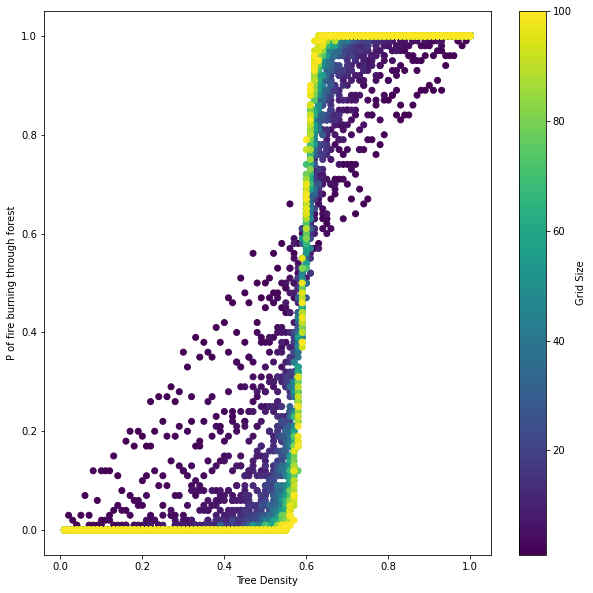

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_probs(ax, prob_means1)

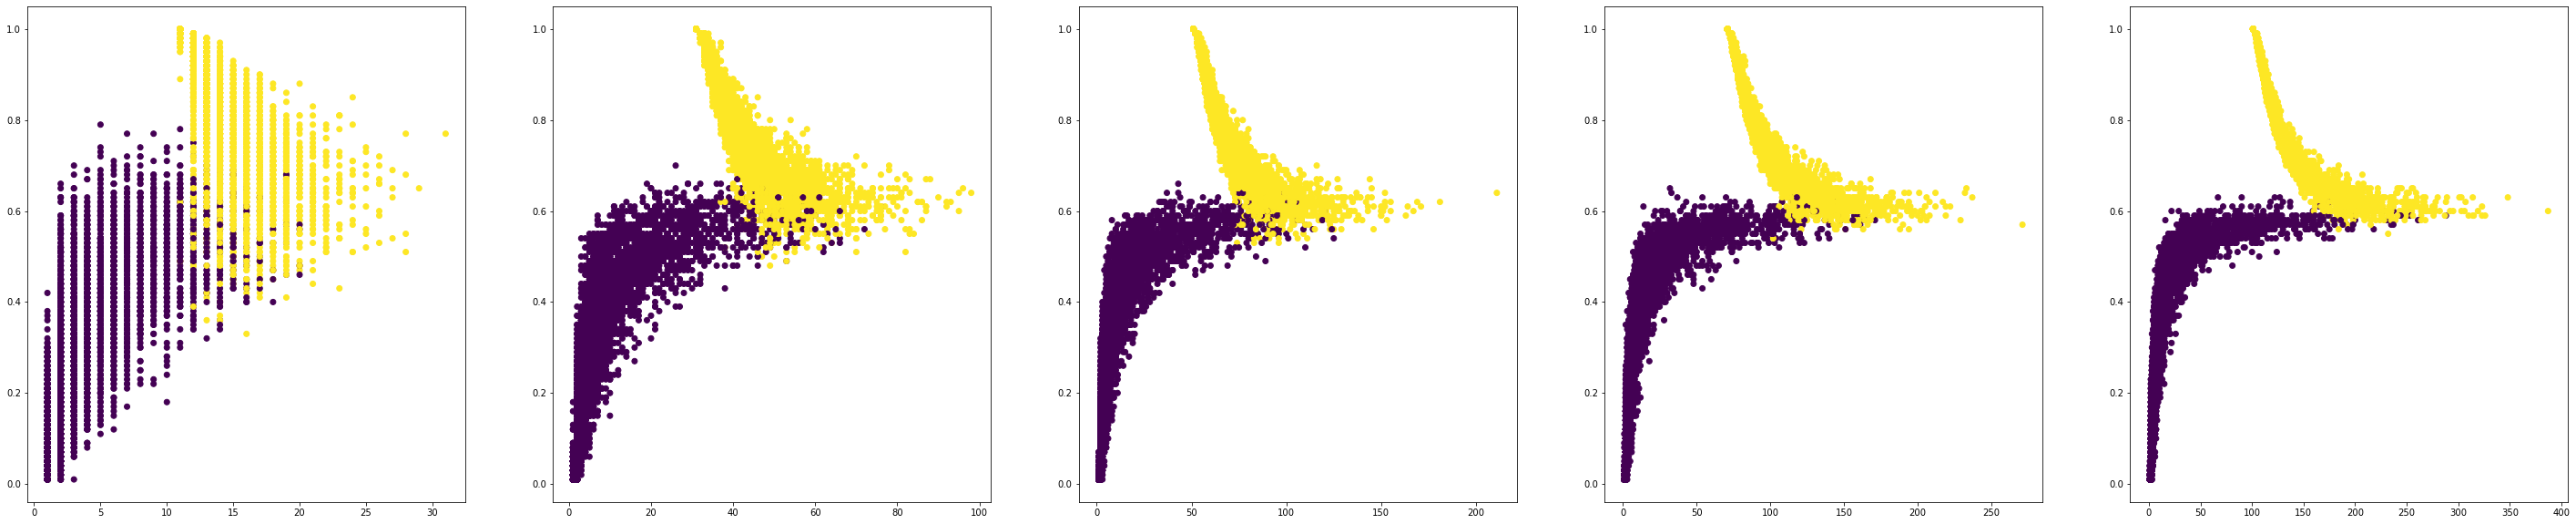

In [16]:
fig, axarr = plt.subplots(1,5, figsize=(50, 10))
for i, n in enumerate([10,30,50,70,100]):
    data = dataset1[dataset1["n"] == n]
    axarr[i].scatter(x=data["n_steps"],y=data["p"], c=data["bottom_reached"])
    


In [7]:
from glob import glob

def read_wind_data(direction):
    df = pd.DataFrame()
    files = glob(f"wind_data/*_{direction}_output.csv")
    for file in files:
        new_data = pd.read_csv(file)
        i = int(file.split("\\")[1].split("_")[0])
        new_data["seed"] = i
        df = df.append(new_data)
    return df

south_data = read_wind_data("S")



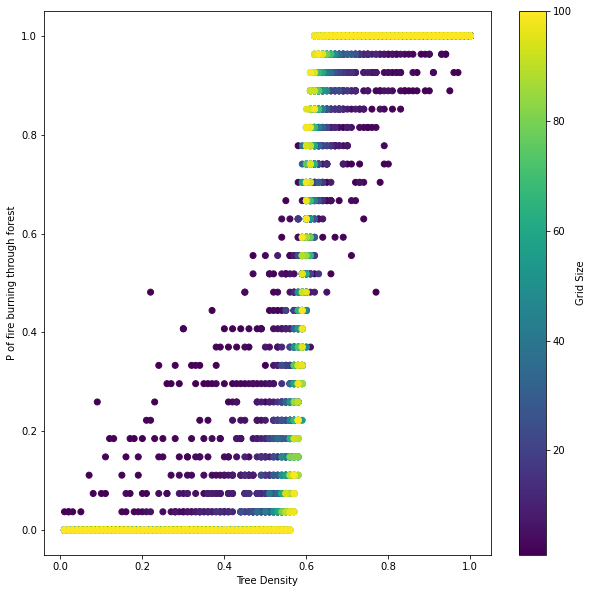

In [8]:
fig2, ax2 = plt.subplots(figsize=(10, 10))
south_probs = south_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()
plot_probs(ax2, south_probs)

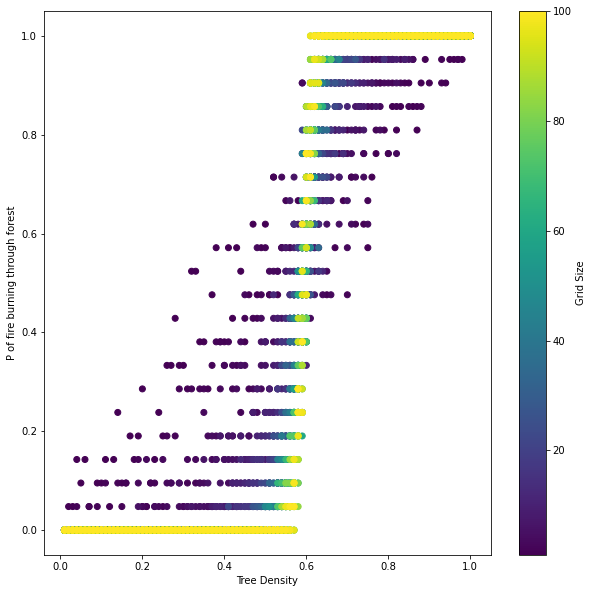

In [9]:
fig3, ax3 = plt.subplots(figsize=(10, 10))

north_data = read_wind_data("N")
north_probs = north_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()
plot_probs(ax3, north_probs)

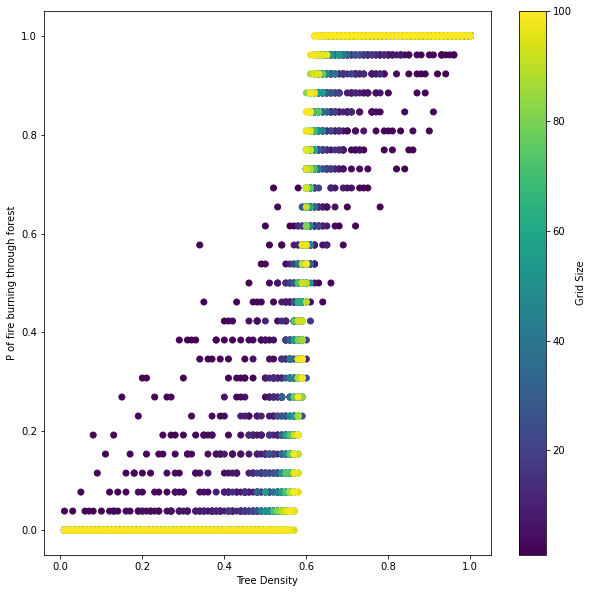

In [10]:
fig4, ax4 = plt.subplots(figsize=(10, 10))
west_data = read_wind_data("W")
west_probs = west_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()
plot_probs(ax4, west_probs)

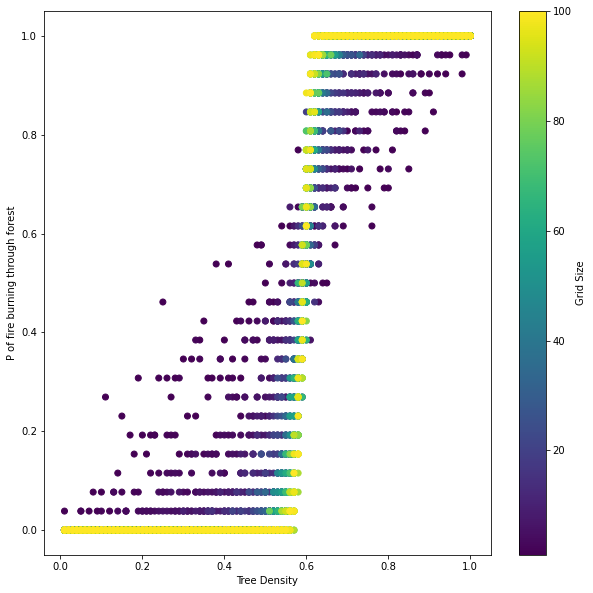

In [11]:
fig5, ax5 = plt.subplots(figsize=(10, 10))
east_data = read_wind_data("E")
east_probs = east_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()
plot_probs(ax5, east_probs)


In [12]:
east_probs

,n,p,bottom_reached
0,1,0.010000,0.038462
1,1,0.020000,0.000000
2,1,0.030000,0.000000
3,1,0.040000,0.000000
4,1,0.050000,0.038462
...,...,...,...
9995,100,0.959999,1.000000
9996,100,0.969999,1.000000
9997,100,0.979999,1.000000
9998,100,0.989999,1.000000


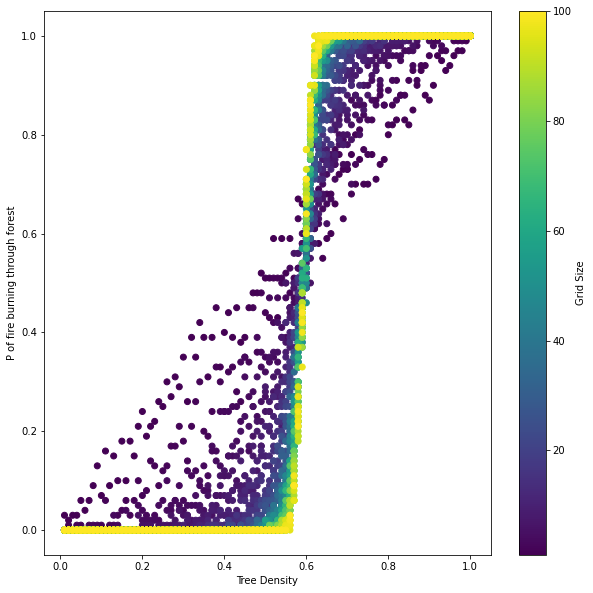

In [13]:
fig6, ax6 = plt.subplots(figsize=(10, 10))
dataset2 = read_wind_data("*")

dataset2

prob_means2 = dataset2.groupby(["n","p"])["bottom_reached"].mean().reset_index()

plot_probs(ax6, prob_means2)